Results don't change, already converge


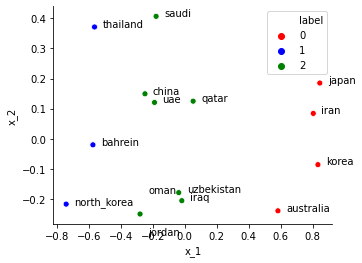

In [2]:
from math import sqrt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import palettes
from sklearn.decomposition import PCA


def read_data():
    data = pd.read_csv('data/asian_football_data_for_cluster.csv', header=0, index_col=0)
    return data.index.tolist(), np.array(norm(data)).tolist()


def distance(A, B):
    return sqrt(sum((i-j)**2 for i, j in zip(A, B)))


def norm(data):
    return (data-data.min())/(data.max()-data.min())


def random_assign(data):
    cluster_a = data[1]
    cluster_b = data[12]
    cluster_c = data[7]
    # tmp_b = [distance(i, cluster_a) for i in data]
    # cluster_b = data[tmp_b.index(max(tmp_b))]
    # tmp_c = [distance(i, cluster_a) + distance(i, cluster_b) for i in data]
    # cluster_c = data[tmp_c.index(max(tmp_c))]
    return [cluster_a, cluster_b, cluster_c]
    

def cluster(teams, data): 
    centers = random_assign(data)
    generate = ''
    old = ''
    while(1):
        results = [[],[],[]]
        old = generate
        generate = ''
        for i in range(len(data)):
            dis = [distance(data[i], j) for j in centers]
            results[dis.index(min(dis))].append(i)
            generate += str(dis.index(min(dis)))
        if old == generate:
            print('Results don\'t change, already converge')
            break
        centers = [cal_new_center(data, j) for j in results]
    return list(generate)
    

def cal_new_center(data, idxs):
    sum = [0., 0., 0., 0.]
    for i in range(len(idxs)):
        for j in range(4):
            sum[j] += data[idxs[i]][j]
    return [val/len(idxs) for val in sum]


def dimension_reduction(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(np.array(data).tolist())


def show(data):
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.scatterplot(x=data.x_1, y=data.x_2, hue='label', data=data, ax=ax, palette=['red', 'blue', 'green'])
    ax.set(xlabel='x_1', ylabel='x_2')
    for idx, row in data.iterrows():
        x = row['x_1']
        y = row['x_2']
        text = row['name']
        # to distinguish between jordan and oman since they have the same value
        if text == 'jordan':
            ax.text(x+.05, y-.07, text, horizontalalignment='left')
        elif text == 'oman':
            ax.text(x+.05, y+.07, text, horizontalalignment='left')
        else:
            ax.text(x+.05, y, text, horizontalalignment='left')
    sns.despine(fig)
    plt.show()
    # plt.savefig('result', format='pdf', dpi = 300)

teams, data = read_data()
data_2d = dimension_reduction(data)
labels = cluster(teams, data)
show(pd.DataFrame({'name':teams,'x_1':data_2d[:, 0], 'x_2':data_2d[:, 1], 'label':labels}))
    